# 聚类分析:无监督学习

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,DBSCAN
from sklearn.datasets import load_iris,load_diabetes,make_blobs
import warnings
warnings.filterwarnings("ignore")

# Kmeans聚类

In [11]:
#建立数据
X, y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=42)

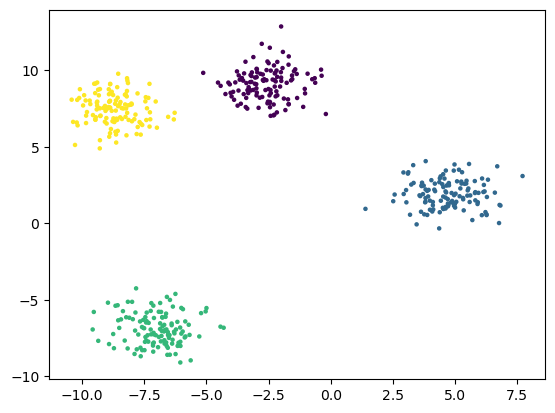

In [13]:
#绘制原始数据
plt.scatter(X[:,0],X[:,1],c=y,s=5)
plt.show()

#### 我们建立了一个四类的数据,在实际问题中我们是无法直接得知聚为几类最为合适,此时需要借助肘部法和轮廓系数法,以及结合实际情况

In [22]:
KMeans(n_clusters = 2,max_iter=100,random_state=42).fit(X)

KMeans(max_iter=100, n_clusters=2, random_state=42)

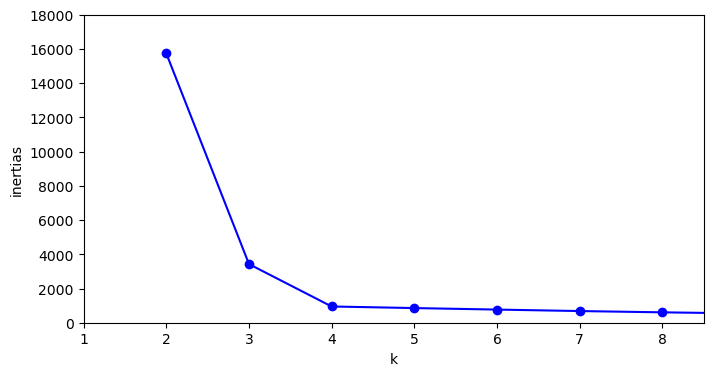

In [28]:
kmeans_per_k = [KMeans(n_clusters = k,max_iter=100,random_state=42).fit(X) for k in range(2,10)]#从这10个聚类结果得出肘部图
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8,4))
plt.plot(range(2,10),inertias,'bo-')
plt.axis([1,8.5,0,18000])
plt.xlabel('k')
plt.ylabel('inertias')
plt.show()

从图上来看,在k为3或者4时曲线转变较大,所以很可能聚为3或者4时最合适,继续根据轮廓系数判断,轮廓系数越大越好

In [32]:
from sklearn.metrics import silhouette_score#导入计算轮廓系数的库
silhouette_scores = [silhouette_score(X,model.labels_) for model in kmeans_per_k]
silhouette_scores

[0.5955207405315346,
 0.7613478432173022,
 0.7911042588289479,
 0.6645885844854881,
 0.5360399296938985,
 0.43126520401443313,
 0.33839552079574076,
 0.3520840181940742]

In [51]:
score=[]
for k in range(2,10):
    kmean=KMeans(n_clusters = k,max_iter=100,random_state=42).fit(X)
    silhouette_scores =silhouette_score(X,kmean.labels_)
    score.append([k,silhouette_scores])
print('{:*^60}'.format('K值对应的轮廓系数:'))
score=np.array(score)
print(score)
max_index=np.argmax(score[:,1])
first_column_value = score[max_index, 0]
print('最优的K值是:{0} \n对应的轮廓系数是:{1}'.format(first_column_value,max(score[:,1])))

*************************K值对应的轮廓系数:*************************
[[2.         0.59552074]
 [3.         0.76134784]
 [4.         0.79110426]
 [5.         0.66458858]
 [6.         0.53603993]
 [7.         0.4312652 ]
 [8.         0.33839552]
 [9.         0.35208402]]
最优的K值是:4.0 
对应的轮廓系数是:0.7911042588289479


从轮廓系数来看,当k=4时是最佳聚类结果

## 聚类查看每一次迭代过程

In [66]:
X

array([[ -7.68905443,   6.62034649],
       [ -9.57651383,  -6.93440446],
       [  6.82968177,   1.1648714 ],
       [ -2.90130578,   7.55077118],
       [ -5.67841327,  -7.28818497],
       [ -6.04929137,  -7.73619342],
       [ -6.27824322,   7.22746302],
       [ -6.60917037,  -6.9303477 ],
       [  3.57225841,   1.8307902 ],
       [ -7.50444577,  -6.85401854],
       [  3.99330595,   0.89162168],
       [ -1.35060204,   8.19360381],
       [  6.77291221,   0.02108188],
       [ -1.93830711,  10.14985177],
       [ -6.58985233,  -4.80470879],
       [  5.69830332,   0.2144302 ],
       [ -2.58120774,  10.01781903],
       [ -9.96104978,   7.70593266],
       [ -8.75604377,   8.38900329],
       [ -3.6155326 ,   7.8180795 ],
       [  3.24131126,   2.53613892],
       [ -2.30033403,   7.054616  ],
       [  5.2164358 ,   2.28441984],
       [ -7.27280373,   7.25777265],
       [ -9.28476137,   7.51761291],
       [ -6.48517505,  -7.30109407],
       [ -7.13460441,  -5.3761166 ],
 

In [78]:

kmeans_iter4 = KMeans(n_clusters = 4,max_iter=4,random_state=42)

kmeans_iter4.fit(X)

y_pred1 = kmeans_iter4.fit_predict(X)

- KMeans因为并不需要建立模型或者预测结果，因此我们只需要fit就能够得到聚类结果了

- KMeans也有接口predict和fit_predict，表示学习数据X并对X的类进行预测

- 但所得到的结果和我们不调用predict，直接fit之后调用属性labels一模一伴

In [83]:
y_pred = kmeans_iter4.labels_#与y_pred1一样

In [79]:
centroid = kmeans_iter4.cluster_centers_#质心

In [84]:
#重要属性inertia_，查看总距离平方和
inertia = kmeans_iter4.inertia_

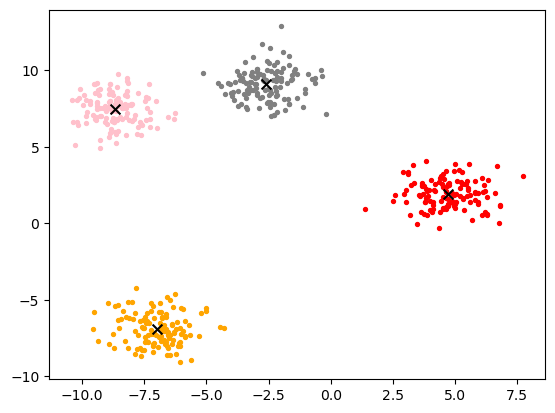

In [81]:
color = ["red","pink","orange","gray"]

fig, ax1 = plt.subplots(1)

for i in range(4):
    ax1.scatter(X[y_pred1==i, 0], X[y_pred1==i, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            ,c=color[i]
           )
    
ax1.scatter(centroid[:,0],centroid[:,1]
           ,marker="x"
           ,s=50
           ,c="black")
plt.show()

## 密度聚类:DBSCAN
- DBSCAN的关键参数是eps和min_samples
- DBSCAN可以找出离群点

In [85]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

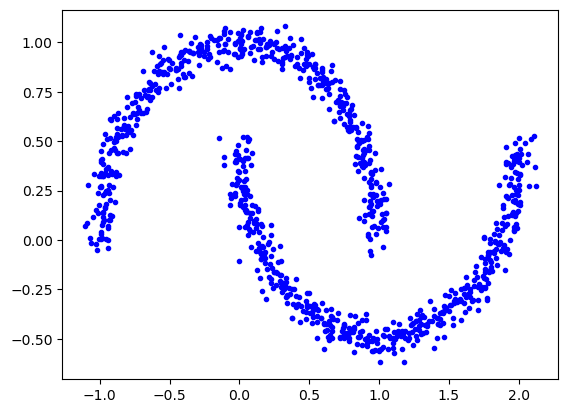

In [86]:
plt.plot(X[:,0],X[:,1],'b.')

### 不同eps对结果的影响

In [97]:
from sklearn.cluster import DBSCAN
dbscan1 = DBSCAN(eps = 0.05,min_samples=5)
dbscan2 = DBSCAN(eps = 0.08,min_samples=5)
dbscan3 = DBSCAN(eps = 0.12,min_samples=5)
dbscan1.fit(X)
dbscan2.fit(X)
dbscan3.fit(X)

DBSCAN(eps=0.12)

In [98]:
y_pred1=dbscan1.labels_#预测结果
y_pred2=dbscan2.labels_#预测结果
y_pred3=dbscan3.labels_#预测结果

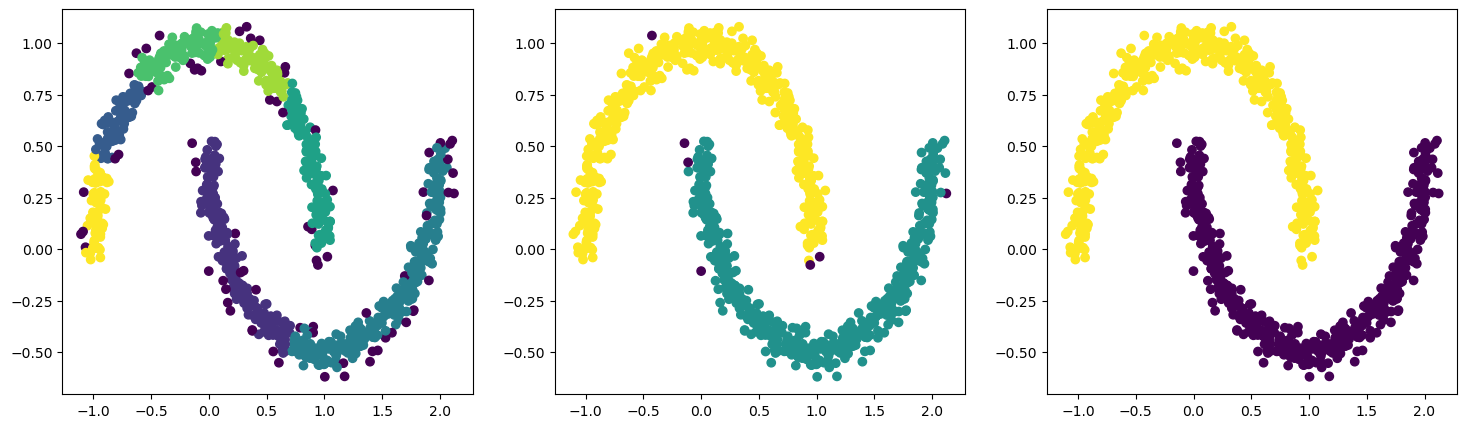

In [100]:
plt.figure(figsize=(18,5))
plt.subplot(131)
plt.scatter(X[:,0],X[:,1], c=y_pred1)

plt.subplot(132)
plt.scatter(X[:,0],X[:,1], c=y_pred2)

plt.subplot(133)
plt.scatter(X[:,0],X[:,1], c=y_pred3)
plt.show()

## 密度聚类与kmean聚类

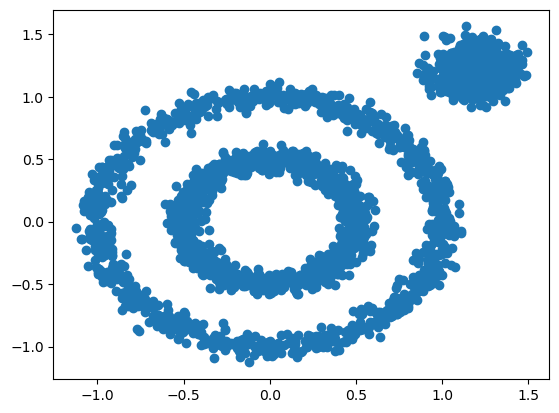

In [102]:
from sklearn import datasets
x1, y1 = datasets.make_circles(n_samples=2000, factor=0.5, noise=0.05)
x2, y2 = datasets.make_blobs(n_samples=1000, centers=[[1.2,1.2]], cluster_std=[[.1]])

x = np.concatenate((x1, x2))
plt.scatter(x[:, 0], x[:, 1], marker='o')
plt.show()

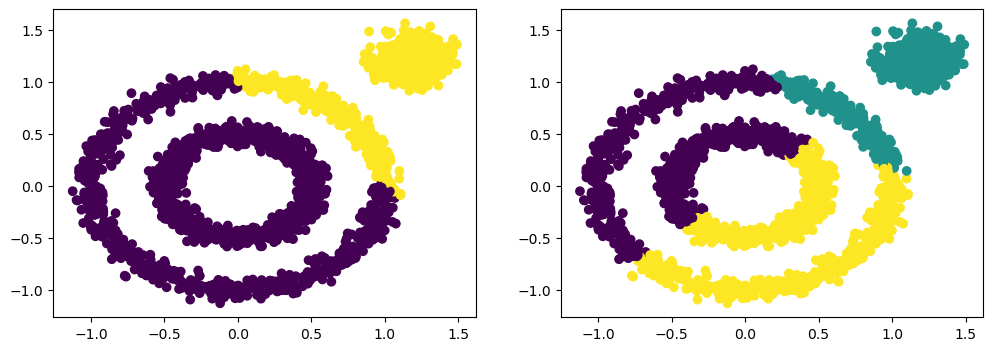

In [106]:
#使用kmean聚类,无论聚几类都不能正确聚类
from sklearn.cluster import KMeans
plt.figure(figsize=(12,4))
plt.subplot(121)
y_pred1 = KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred1)

plt.subplot(122)
y_pred2 = KMeans(n_clusters=3).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred2)
plt.show()

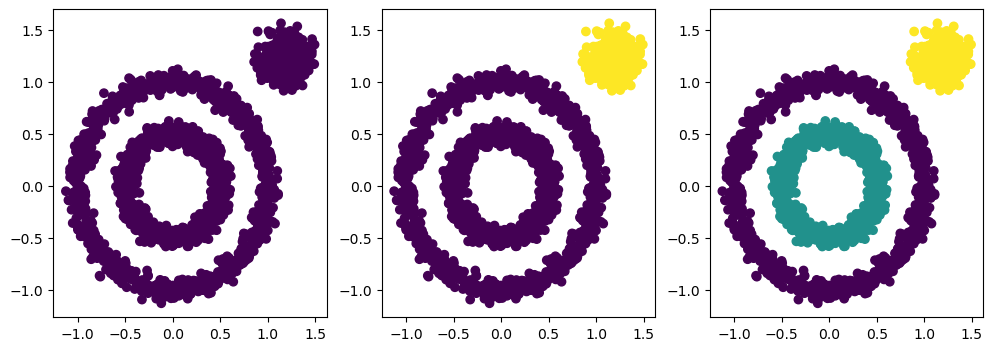

In [113]:
#使用DBSCAN,通过调试eps和min_sample可以优化聚类结果
from sklearn.cluster import DBSCAN
plt.figure(figsize=(12,4))
plt.subplot(131)
y_pred1 = DBSCAN().fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred1)

plt.subplot(132)
y_pred2 = DBSCAN(eps = 0.2,min_samples=200).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred2)

plt.subplot(133)
y_pred3 = DBSCAN(eps = 0.2, min_samples=50).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred3)
plt.show()